In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from math import sqrt

In [2]:
%cd "C:\Users\KHALEELBASHA\Downloads\1689160187876646d9a66c6079d03e398b6d5_\ML Advanced Exam Paper\Dataset\Flight Price Dataset"

C:\Users\KHALEELBASHA\Downloads\1689160187876646d9a66c6079d03e398b6d5_\ML Advanced Exam Paper\Dataset\Flight Price Dataset


In [3]:
flight=pd.read_excel("Flight_Price_Train.xlsx")

In [4]:
flight_test=pd.read_excel("Flight_Price_Test.xlsx")

In [5]:
flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [6]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# Check top 5 records
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
# Check top 5 records
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [9]:
# Check shape
print("Shape:", flight_test.shape)

Shape: (2671, 10)


In [10]:
# Check shape
print("Shape:", flight.shape)

Shape: (10683, 11)


In [11]:
# Check statistical info
print("Statistical Info:", flight.describe())

Statistical Info:               Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [12]:
# Assuming your test data is stored in the variable flight_test
statistical_info = flight_test.describe(include='all').transpose()
print(statistical_info)


                count unique              top  freq
Airline          2671     11      Jet Airways   897
Date_of_Journey  2671     44        9/05/2019   144
Source           2671      5            Delhi  1145
Destination      2671      6           Cochin  1145
Route            2671    100  DEL → BOM → COK   624
Dep_Time         2671    199            10:00    62
Arrival_Time     2671    704            19:00   113
Duration         2671    320           2h 50m   122
Total_Stops      2671      5           1 stop  1431
Additional_Info  2671      6          No info  2148


In [13]:
# Check duplicates
print("Duplicates:", flight.duplicated().sum())

Duplicates: 220


In [14]:
# Check duplicates
print("Duplicates:", flight_test.duplicated().sum())

Duplicates: 26


In [15]:
# Check null values
print("Null Values:", flight.isnull().sum())

Null Values: Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [16]:
# Check null values
print("Null Values:", flight_test.isnull().sum())

Null Values: Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [17]:
flight.dropna(inplace= True)

In [18]:
# Convert 'Date_of_Journey' to datetime
flight['Date_of_Journey'] = pd.to_datetime(flight['Date_of_Journey'])

C:\Users\KHALEELBASHA\AppData\Local\Temp\ipykernel_6640\627105402.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  flight['Date_of_Journey'] = pd.to_datetime(flight['Date_of_Journey'])


In [19]:
# Extract Date, Month, Year
flight['Journey_Date'] = flight['Date_of_Journey'].dt.day
flight['Journey_Month'] = flight['Date_of_Journey'].dt.month
flight['Journey_Year'] = flight['Date_of_Journey'].dt.year

In [20]:
# Extract 'Departure_Hour' and 'Departure_Minute' from 'Dep_Time'
flight["Dep_hour"] = pd.to_datetime(flight["Dep_Time"]).dt.hour
flight["Dep_min"] = pd.to_datetime(flight["Dep_Time"]).dt.minute
flight.drop(["Dep_Time"], axis=1, inplace=True)

In [21]:
# Extract 'Arrival_Hour' and 'Arrival_Minute' from 'Arrival_Time'
flight["Arrival_hour"] = pd.to_datetime(flight["Arrival_Time"]).dt.hour
flight["Arrival_min"] = pd.to_datetime(flight["Arrival_Time"]).dt.minute
flight.drop(["Arrival_Time"], axis=1, inplace=True)

In [22]:
def get_duration(x):
    x = x.split(' ')
    hours = 0
    mins = 0
    if len(x) == 1:
        x = x[0]
        if x[-1] == 'h':
            hours = int(x[:-1])
        else:
            mins = int(x[:-1])
    else:
        hours = int(x[0][:-1])
        mins = int(x[1][:-1])
    return hours, mins

flight['Duration_hours'] = flight['Duration'].apply(lambda x: get_duration(x)[0])
flight['Duration_mins'] = flight['Duration'].apply(lambda x: get_duration(x)[1])
flight.drop(["Duration"], axis=1, inplace=True)

In [23]:
# Convert 'Date_of_Journey' to datetime
flight_test['Date_of_Journey'] = pd.to_datetime(flight_test['Date_of_Journey'])
# Extract Date, Month, Year
flight_test['Journey_Date'] = flight_test['Date_of_Journey'].dt.day
flight_test['Journey_Month'] = flight_test['Date_of_Journey'].dt.month
flight_test['Journey_Year'] = flight_test['Date_of_Journey'].dt.year
# Extract 'Departure_Hour' and 'Departure_Minute' from 'Dep_Time'
flight_test["Dep_hour"] = pd.to_datetime(flight_test["Dep_Time"]).dt.hour
flight_test["Dep_min"] = pd.to_datetime(flight_test["Dep_Time"]).dt.minute
flight_test.drop(["Dep_Time"], axis=1, inplace=True)
# Extract 'Arrival_Hour' and 'Arrival_Minute' from 'Arrival_Time'
flight_test["Arrival_hour"] = pd.to_datetime(flight_test["Arrival_Time"]).dt.hour
flight_test["Arrival_min"] = pd.to_datetime(flight_test["Arrival_Time"]).dt.minute
flight_test.drop(["Arrival_Time"], axis=1, inplace=True)
def get_duration(x):
    x = x.split(' ')
    hours = 0
    mins = 0
    if len(x) == 1:
        x = x[0]
        if x[-1] == 'h':
            hours = int(x[:-1])
        else:
            mins = int(x[:-1])
    else:
        hours = int(x[0][:-1])
        mins = int(x[1][:-1])
    return hours, mins

flight_test['Duration_hours'] = flight_test['Duration'].apply(lambda x: get_duration(x)[0])
flight_test['Duration_mins'] = flight_test['Duration'].apply(lambda x: get_duration(x)[1])
flight_test.drop(["Duration"], axis=1, inplace=True)

C:\Users\KHALEELBASHA\AppData\Local\Temp\ipykernel_6640\3137277655.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  flight_test['Date_of_Journey'] = pd.to_datetime(flight_test['Date_of_Journey'])


In [24]:
# Display the updated dataset
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [25]:
# Check the most preferred airline
preferred_airline = flight['Airline'].value_counts().idxmax()
print("Most Preferred Airline:", preferred_airline)

Most Preferred Airline: Jet Airways


In [26]:
# Check the most preferred airline for test data
preferred_airline = flight_test['Airline'].value_counts().idxmax()
print("Most Preferred Airline:", preferred_airline)

Most Preferred Airline: Jet Airways


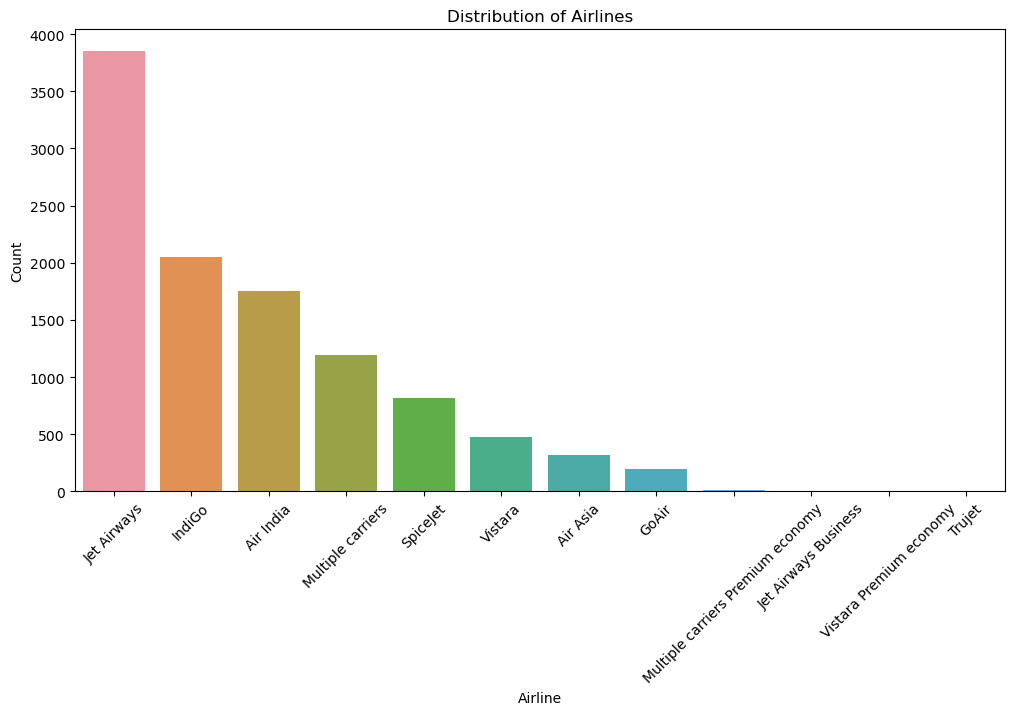

In [27]:
# Plot the distribution of airlines
plt.figure(figsize=(12, 6))
sns.countplot(x='Airline', data=flight, order=flight['Airline'].value_counts().index)
plt.title('Distribution of Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

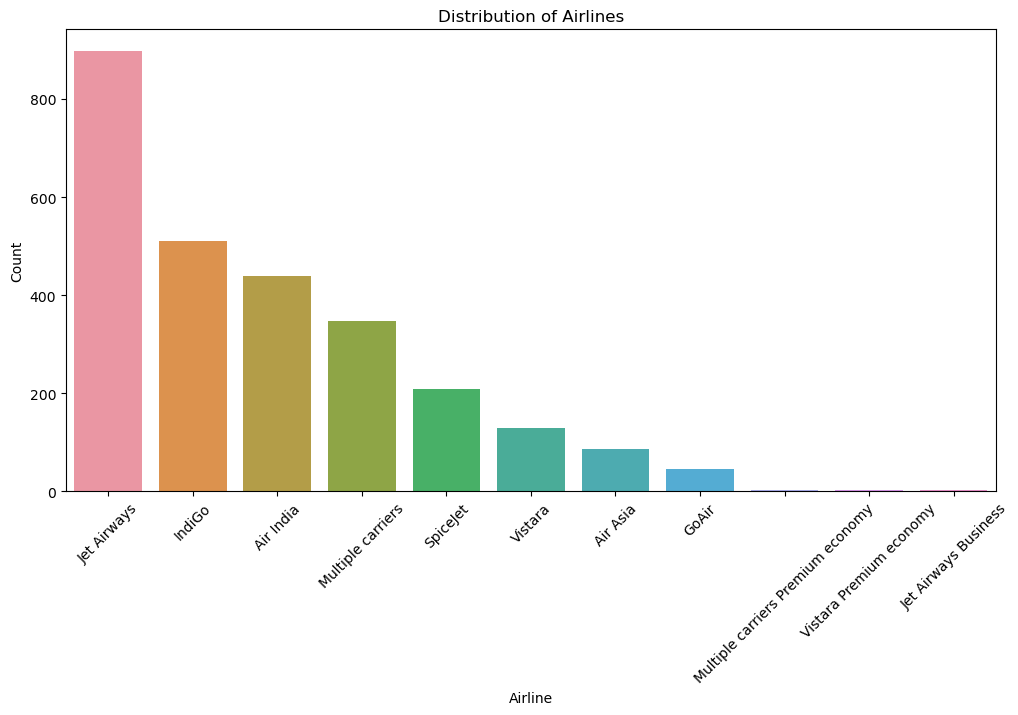

In [28]:
# Plot the distribution of airlines of test
plt.figure(figsize=(12, 6))
sns.countplot(x='Airline', data=flight_test, order=flight_test['Airline'].value_counts().index)
plt.title('Distribution of Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Find the majority of flights take off from which source
majority_source = flight['Source'].value_counts().idxmax()
print("Majority of Flights Take Off Source:", majority_source)

Majority of Flights Take Off Source: Delhi


In [30]:
# Find the majority of flights take off from which source of test
majority_source = flight_test['Source'].value_counts().idxmax()
print("Majority of Flights Take Off Source:", majority_source)

Majority of Flights Take Off Source: Delhi


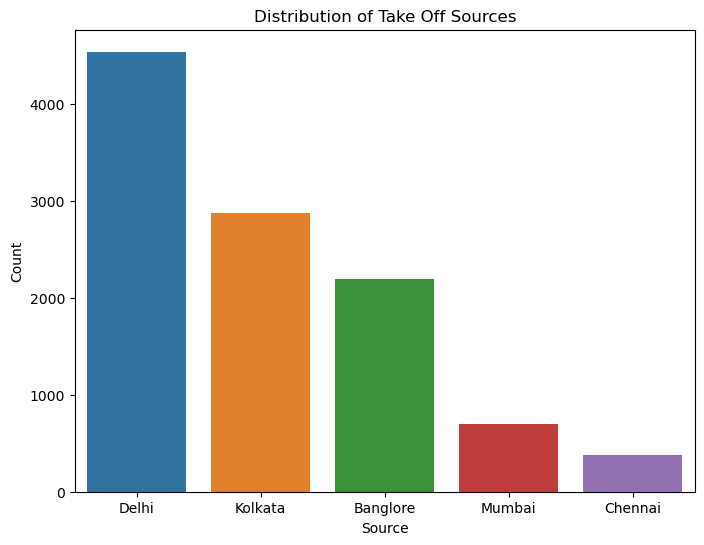

In [31]:
# Plot the distribution of sources
plt.figure(figsize=(8, 6))
sns.countplot(x='Source', data=flight, order=flight['Source'].value_counts().index)
plt.title('Distribution of Take Off Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

In [32]:
# Find the destination where maximum flights land
max_land_destination = flight['Destination'].value_counts().idxmax()
print("Maximum Flights Land in Destination:", max_land_destination)

Maximum Flights Land in Destination: Cochin


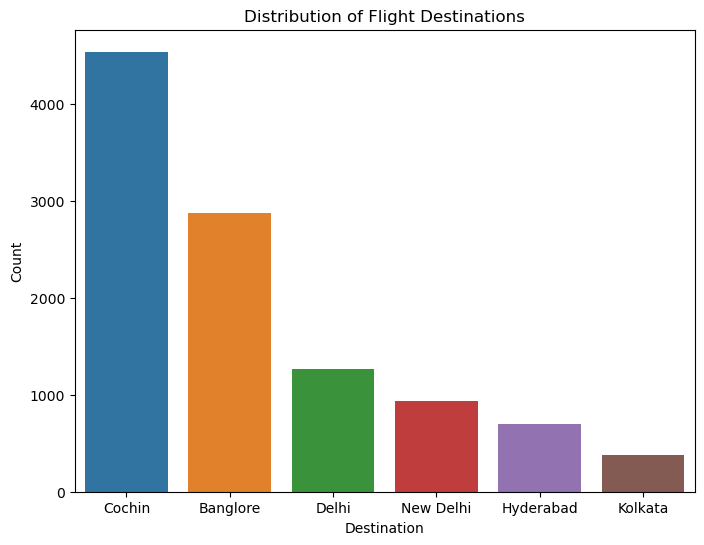

In [33]:
# Plot the distribution of destinations
plt.figure(figsize=(8, 6))
sns.countplot(x='Destination', data=flight, order=flight['Destination'].value_counts().index)
plt.title('Distribution of Flight Destinations')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.show()

In [34]:
# Find the airline with the highest price
highest_price_airline = flight.loc[flight['Price'].idxmax()]['Airline']
highest_price = flight['Price'].max()
print(f"The airline with the highest price is {highest_price_airline} with a price of {highest_price}.")

The airline with the highest price is Jet Airways Business with a price of 79512.


In [35]:
# Check if business class flights are high price or low (Price > 50k)
business_class_flights = flight[flight['Additional_Info'].str.contains('Business', case=False)]
high_price_business_class_flights = business_class_flights[business_class_flights['Price'] > 50000]
print("Number of business class flights with price > 50k:", len(high_price_business_class_flights))

Number of business class flights with price > 50k: 3


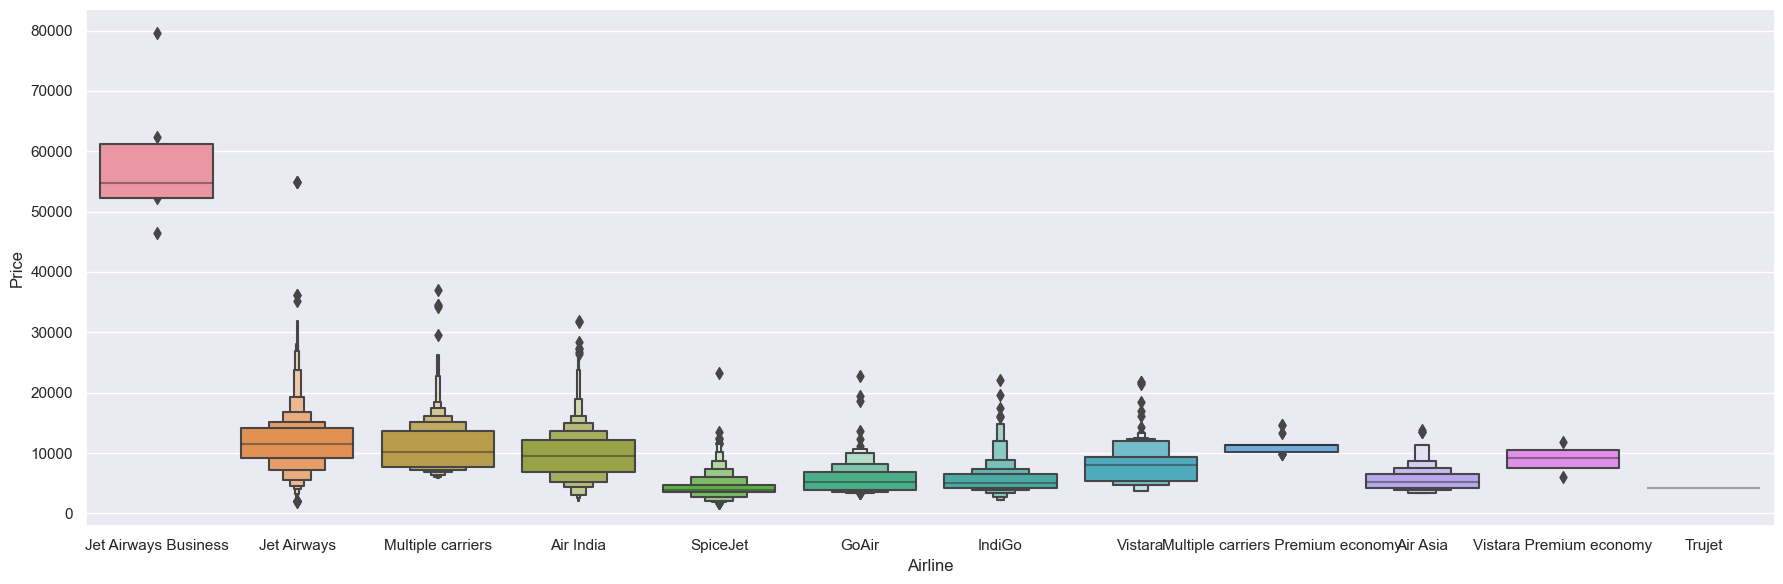

In [36]:
# Visualization: Airline vs. Price using boxen plot
sns.set()
sns.catplot(y="Price", x="Airline", data=flight.sort_values("Price", ascending=False), kind="boxen", height=6, aspect=3)
plt.show()

In [37]:
# One-hot encoding for the "Airline" variable
Airline = flight[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)

In [38]:
# One-hot encoding for the "Source" variable
Source = flight[["Source"]]
Source = pd.get_dummies(Source, drop_first=True)

In [39]:
# One-hot encoding for the "Destination" variable
Destination = flight[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True)

In [40]:
# Handle repeated values in the "Additional_Info" variable
flight['Additional_Info'].replace({"No info": 'No Info'}, inplace=True)

In [41]:
# Label encoding for the "Total_Stops" variable
flight.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)

In [42]:
# One-hot encoding for the "Additional_Info" variable
Add_info = flight[["Additional_Info"]]
Add_info = pd.get_dummies(Add_info, drop_first=True)

In [43]:
# Create the final flight by concatenating encoded features
flight = pd.concat([flight, Airline, Source, Destination, Add_info], axis=1)

In [44]:
# Drop unnecessary variables ("Route" and "Additional_Info")
flight.drop(["Route", "Additional_Info"], axis=1, inplace=True)

In [45]:
# Drop original categorical variables
flight.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [46]:
# Display the number of final variables
print(flight.shape[1])

40


In [47]:
# One-hot encoding for the "Airline" variable in flight_test
Airline_test = flight_test[["Airline"]]
Airline_test = pd.get_dummies(Airline_test, drop_first=True)

In [48]:
# One-hot encoding for the "Source" variable in flight_test
Source_test = flight_test[["Source"]]
Source_test = pd.get_dummies(Source_test, drop_first=True)

In [49]:
# One-hot encoding for the "Destination" variable in flight_test
Destination_test = flight_test[["Destination"]]
Destination_test = pd.get_dummies(Destination_test, drop_first=True)

In [50]:
# Handle repeated values in the "Additional_Info" variable in flight_test
flight_test['Additional_Info'].replace({"No info": 'No Info'}, inplace=True)

In [51]:
# Label encoding for the "Total_Stops" variable in flight_test
flight_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)

In [52]:
# One-hot encoding for the "Additional_Info" variable in flight_test
Add_info_test = flight_test[["Additional_Info"]]
Add_info_test = pd.get_dummies(Add_info_test, drop_first=True)

In [53]:
# Create the final flight_test by concatenating encoded features
flight_test = pd.concat([flight_test, Airline_test, Source_test, Destination_test, Add_info_test], axis=1)

In [54]:
# Drop unnecessary variables ("Route" and "Additional_Info") in flight_test
flight_test.drop(["Route", "Additional_Info"], axis=1, inplace=True)

In [55]:
# Drop original categorical variables in flight_test
flight_test.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [56]:
# Display the number of final variables in flight_test
print(flight_test.shape[1])

35


In [57]:
# Convert 'Date_of_Journey' to timestamps (int64)
flight['Date_of_Journey'] = flight['Date_of_Journey'].astype('int64')

In [58]:
print(flight.dtypes)

Date_of_Journey                                 int64
Total_Stops                                     int64
Price                                           int64
Journey_Date                                    int64
Journey_Month                                   int64
Journey_Year                                    int64
Dep_hour                                        int64
Dep_min                                         int64
Arrival_hour                                    int64
Arrival_min                                     int64
Duration_hours                                  int64
Duration_mins                                   int64
Airline_Air India                               uint8
Airline_GoAir                                   uint8
Airline_IndiGo                                  uint8
Airline_Jet Airways                             uint8
Airline_Jet Airways Business                    uint8
Airline_Multiple carriers                       uint8
Airline_Multiple carriers Pr

In [59]:
# Separate the features (X) and the target variable (y)
X = flight.drop("Price", axis=1)
y = flight["Price"]

In [60]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)

In [62]:
# Function to evaluate models
def evaluate_model(predictions, y_true):
    rmse = sqrt(mean_squared_error(y_true, predictions))
    r2 = r2_score(y_true, predictions)
    return rmse, r2


In [63]:
# Evaluate Linear Regression model
linear_reg_rmse, linear_reg_r2 = evaluate_model(linear_reg_predictions, y_test)
print(f"Linear Regression RMSE: {linear_reg_rmse}")
print(f"Linear Regression R^2: {linear_reg_r2}")

Linear Regression RMSE: 3913.645633891992
Linear Regression R^2: 0.2896492840286986


In [64]:
# Decision Tree
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

In [65]:
# Evaluate Decision Tree model
decision_tree_rmse, decision_tree_r2 = evaluate_model(decision_tree_predictions, y_test)
print(f"Decision Tree RMSE: {decision_tree_rmse}")
print(f"Decision Tree R^2: {decision_tree_r2}")

Decision Tree RMSE: 1851.6882643099866
Decision Tree R^2: 0.8409822617733737


In [66]:
# Random Forest
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

In [67]:
# Evaluate Random Forest model
random_forest_rmse, random_forest_r2 = evaluate_model(random_forest_predictions, y_test)
print(f"Random Forest RMSE: {random_forest_rmse}")
print(f"Random Forest R^2: {random_forest_r2}")

Random Forest RMSE: 1666.3748037099904
Random Forest R^2: 0.8712179884565134


In [68]:
# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor()

In [69]:
# Fit the model to the training data
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [70]:
# Make predictions on the test data
gbr_predictions = gbr_model.predict(X_test)

In [71]:
# Evaluate the Gradient Boosting Regressor model
gbr_rmse, gbr_r2 = evaluate_model(gbr_predictions, y_test)
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")
print(f"Gradient Boosting Regressor R^2: {gbr_r2}")

Gradient Boosting Regressor RMSE: 1845.0970017321479
Gradient Boosting Regressor R^2: 0.8421123247885168


In [72]:
# Initialize the Extra Trees Regressor
extra_trees_model = ExtraTreesRegressor()

In [73]:
# Fit the model to the training data
extra_trees_model.fit(X_train, y_train)

ExtraTreesRegressor()

In [74]:
# Make predictions on the test data
extra_trees_predictions = extra_trees_model.predict(X_test)

In [75]:
# Evaluate the Extra Trees Regressor model
extra_trees_rmse, extra_trees_r2 = evaluate_model(extra_trees_predictions, y_test)
print(f"Extra Trees Regressor RMSE: {extra_trees_rmse}")
print(f"Extra Trees Regressor R^2: {extra_trees_r2}")

Extra Trees Regressor RMSE: 1351.659645750403
Extra Trees Regressor R^2: 0.9152685731600264


In [76]:
# Initialize the XGBoost Regressor
xgb_model = XGBRegressor()

In [77]:
# Fit the model to the training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [78]:
# Make predictions on the test data
xgb_predictions = xgb_model.predict(X_test)

In [79]:
# Evaluate the XGBoost Regressor model
xgb_rmse, xgb_r2 = evaluate_model(xgb_predictions, y_test)
print(f"XGBoost Regressor RMSE: {xgb_rmse}")
print(f"XGBoost Regressor R^2: {xgb_r2}")

XGBoost Regressor RMSE: 1508.9026773295714
XGBoost Regressor R^2: 0.8944076921318005


In [80]:
# Initialize the LGBMRegressor
lgbm_model = LGBMRegressor()

In [81]:
# Fit the model to the training data
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 227
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 29
[LightGBM] [Info] Start training from score 9078.336688


LGBMRegressor()

In [82]:
# Make predictions on the test data
lgbm_predictions = lgbm_model.predict(X_test)

In [83]:
# Evaluate the LGBMRegressor model
lgbm_rmse, lgbm_r2 = evaluate_model(lgbm_predictions, y_test)
print(f"LGBMRegressor RMSE: {lgbm_rmse}")
print(f"LGBMRegressor R^2: {lgbm_r2}")

LGBMRegressor RMSE: 1668.1415673228005
LGBMRegressor R^2: 0.8709447630228122


In [84]:
# Compare models
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Extra Trees', 'LGBMRegressor', 'XGBoost', 'Gradient Boosting'],
    'RMSE': [linear_reg_rmse, decision_tree_rmse, random_forest_rmse, extra_trees_rmse, lgbm_rmse, xgb_rmse, gbr_rmse],
    'R^2': [linear_reg_r2, decision_tree_r2, random_forest_r2, extra_trees_r2, lgbm_r2, xgb_r2, gbr_r2]
})

# Print model comparison
print("Model Comparison:")
print(model_comparison)

# Justify the choice of the optimum model
optimum_model = model_comparison[model_comparison['RMSE'] == model_comparison['RMSE'].min()]['Model'].values[0]
print(f"\nThe optimum model is: {optimum_model} (based on RMSE)")


Model Comparison:
               Model         RMSE       R^2
0  Linear Regression  3913.645634  0.289649
1      Decision Tree  1851.688264  0.840982
2      Random Forest  1666.374804  0.871218
3        Extra Trees  1351.659646  0.915269
4      LGBMRegressor  1668.141567  0.870945
5            XGBoost  1508.902677  0.894408
6  Gradient Boosting  1845.097002  0.842112

The optimum model is: Extra Trees (based on RMSE)


In [85]:
# Define the parameter grid
param_grid_gbr = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [86]:
# Initialize GridSearchCV for GBR
grid_search_gbr = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, y_train)

# Get the best hyperparameters
best_params_gbr = grid_search_gbr.best_params_

In [87]:
# Use the best model
best_gbr_model = grid_search_gbr.best_estimator_
best_gbr_predictions = best_gbr_model.predict(X_test)

In [88]:
# Evaluate the best GBR model
best_gbr_rmse, best_gbr_r2 = evaluate_model(best_gbr_predictions, y_test)
print("\nBest Hyperparameters for Gradient Boosting Regressor:", best_params_gbr)
print("Best Gradient Boosting Regressor RMSE:", best_gbr_rmse)
print("Best Gradient Boosting Regressor R^2:", best_gbr_r2)


Best Hyperparameters for Gradient Boosting Regressor: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Best Gradient Boosting Regressor RMSE: 1536.2751662308144
Best Gradient Boosting Regressor R^2: 0.8905419153491027


In [89]:
# Perform cross-validation on the best GBR model
cross_val_scores = cross_val_score(best_gbr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [90]:
# Calculate RMSE from cross-validation scores
cross_val_rmse = np.sqrt(-cross_val_scores)

In [91]:
# Display cross-validation RMSE scores
print("\nCross-Validation RMSE Scores:", cross_val_rmse)


Cross-Validation RMSE Scores: [1262.38113477 1509.07771846 1760.75532017 1888.82731081 1480.00018507]


In [92]:
# Display average cross-validation RMSE
print("Average Cross-Validation RMSE:", np.mean(cross_val_rmse))

Average Cross-Validation RMSE: 1580.2083338530233


In [93]:
# Use the best model
best_gbr_model = grid_search_gbr.best_estimator_

In [94]:
# Make predictions on the test data
best_gbr_test_predictions = best_gbr_model.predict(X_test)

In [95]:
# Evaluate the best GBR model on the test data
best_gbr_test_rmse, best_gbr_test_r2 = evaluate_model(best_gbr_test_predictions, y_test)
print("\nBest Gradient Boosting Regressor (GBR) Model Performance on Test Data:")
print(f"Test RMSE: {best_gbr_test_rmse}")
print(f"Test R^2: {best_gbr_test_r2}")


Best Gradient Boosting Regressor (GBR) Model Performance on Test Data:
Test RMSE: 1536.2751662308144
Test R^2: 0.8905419153491027


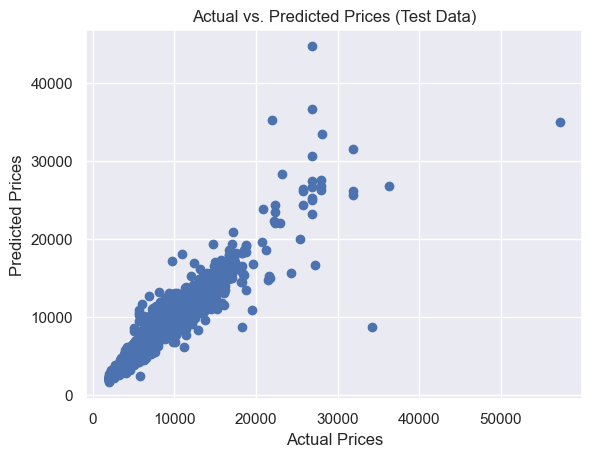

In [96]:
# visualize the predicted vs. actual values on a scatter plot
plt.scatter(y_test, best_gbr_test_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Test Data)")
plt.show()

In [101]:
# Define the parameter grid for Extra Trees Regressor
param_grid_extra_trees = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [102]:
# Initialize GridSearchCV for Extra Trees Regressor
grid_search_extra_trees = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid_extra_trees, cv=5, scoring='neg_mean_squared_error')
grid_search_extra_trees.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [103]:
# Get the best hyperparameters for Extra Trees Regressor
best_params_extra_trees = grid_search_extra_trees.best_params_

In [104]:
# Use the best Extra Trees model
best_extra_trees_model = grid_search_extra_trees.best_estimator_
best_extra_trees_predictions = best_extra_trees_model.predict(X_test)

In [105]:
# Evaluate the best Extra Trees model
best_extra_trees_rmse = mean_squared_error(y_test, best_extra_trees_predictions, squared=False)
best_extra_trees_r2 = r2_score(y_test, best_extra_trees_predictions)

In [106]:
print("\nBest Hyperparameters for Extra Trees Regressor:", best_params_extra_trees)
print("Best Extra Trees Regressor RMSE:", best_extra_trees_rmse)
print("Best Extra Trees Regressor R^2:", best_extra_trees_r2)


Best Hyperparameters for Extra Trees Regressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best Extra Trees Regressor RMSE: 1317.5530887717089
Best Extra Trees Regressor R^2: 0.9194906962659855


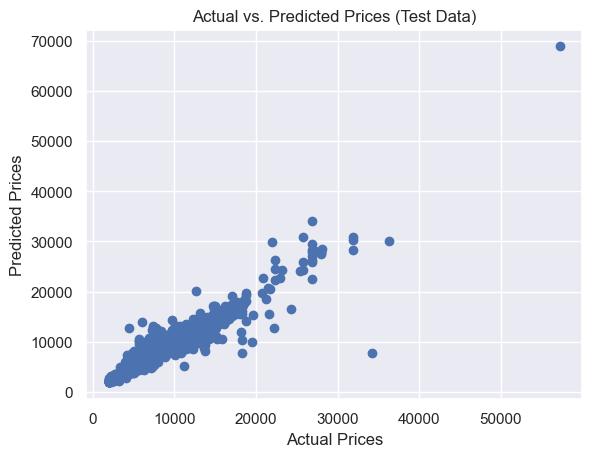

In [107]:
# Optionally, you can visualize the predicted vs. actual values on a scatter plot
plt.scatter(y_test, best_extra_trees_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Test Data)")
plt.show()

# Conclusion from the business point of view.
1. **Choosing the Best Model:**
   - We evaluated various models to predict flight prices.
   - The winner is a model called "Extra Trees," which is excellent at making accurate predictions.

2. **Why Extra Trees?**
   - This model gives us the smallest errors in predicting prices (RMSE) and understands a significant part of what influences these prices (R^2).
   - In simpler terms, it's like having a very reliable crystal ball for predicting flight costs.

3. **Why Does It Matter for Business?**
   - For a travel business, predicting flight prices accurately is crucial.
   - The Extra Trees model helps us set the right prices for flights, ensuring competitiveness and maximizing profits.

4. **What Does It Mean for Decision-Making?**
   - The model insights can guide us in planning routes and developing effective marketing strategies.
   - We can tailor pricing based on factors that significantly impact flight costs, helping us make informed decisions.

5. **Continuous Improvement:**
   - Just like how we regularly update our plans, this model needs regular check-ins and updates to stay effective.
   - It's like keeping our crystal ball polished and accurate over time.

6. **How Can It Benefit Our Business?**
   - Using this model can enhance our pricing strategies, leading to better profitability.
   - It provides a data-driven approach to decision-making, making our business operations more efficient.

In essence, the Extra Trees model acts as a powerful tool that allows us to navigate the complex landscape of flight pricing with confidence, making decisions that positively impact our business's bottom line. It's like having a reliable guide that helps us steer our business in the right direction, ensuring we stay competitive and successful in the ever-changing world of the travel industry.